<a href="https://colab.research.google.com/github/mdhasanali3/loan_risk_check/blob/main/diagnostic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## importing necessary liabraries


In [ ]:
import os
import pandas as pd  # First, we'll import Pandas, a data processing and CSV file I/O library
import numpy as np
from datetime import datetime

from sklearn import preprocessing,metrics 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#'/content/drive/MyDrive/Brain_Station_23/RnD_Lab/
df_loan = pd.read_csv('loans50k.csv', encoding='latin-1')
df_loan.head() # Output the first five rows.

,loanID,amount,term,rate,payment,grade,employment,length,home,income,verified,status,reason,state,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,revolRatio,totalAcc,totalPaid,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
0,188861,8000.0,36 months,0.14,272.07,C,Warehouseman,3 years,RENT,49966.0,Source Verified,Charged Off,credit_card,CA,30.05,0.0,0.0,11.0,0.0,0.55,15.0,5914.67000,48054.0,8100.0,8.0,4369.0,43.0,95.7,60629.0,48054.0,1000.0,52529.0
1,517703,11000.0,36 months,0.10,354.89,B,Vice President,10+ years,MORTGAGE,50000.0,Not Verified,Fully Paid,debt_consolidation,PA,8.74,0.0,2.0,12.0,0.0,0.36,15.0,12024.75000,265838.0,33400.0,4.0,22153.0,19756.0,37.5,297500.0,11844.0,31600.0,0.0
2,268587,35000.0,36 months,0.15,1220.33,D,Owner/Attorney,10+ years,RENT,360000.0,Verified,Current,debt_consolidation,CA,14.50,0.0,1.0,8.0,0.0,0.83,14.0,31668.65000,850150.0,83000.0,2.0,121450.0,7686.0,83.2,907300.0,173260.0,83000.0,100000.0
3,579902,20000.0,60 months,0.12,447.83,C,Analyst,2 years,MORTGAGE,60000.0,Source Verified,Fully Paid,debt_consolidation,CA,14.14,0.0,0.0,12.0,3.0,0.01,48.0,23827.22901,20671.0,14200.0,8.0,1723.0,11061.0,1.2,46964.0,20671.0,11200.0,32764.0
4,617630,12000.0,60 months,0.12,266.88,B,medical technician,10+ years,MORTGAGE,64000.0,Source Verified,Current,debt_consolidation,NJ,5.14,0.0,0.0,8.0,0.0,0.58,22.0,9599.69000,128034.0,14600.0,3.0,18291.0,5904.0,58.4,134600.0,8475.0,14200.0,0.0


## dropping null records


In [ ]:
grade_loan=df_loan.copy()

In [ ]:
grade_loan = grade_loan.dropna() 
df_loan = df_loan.dropna() 

## deleteing some irrelevent columns


In [ ]:
del_col=['state','status','verified','employment']
grade_loan=grade_loan.drop(labels= del_col,axis=1)

In [ ]:
grade_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46714 entries, 0 to 49998
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loanID       46714 non-null  int64  
 1   amount       46714 non-null  float64
 2   term         46714 non-null  object 
 3   rate         46714 non-null  float64
 4   payment      46714 non-null  float64
 5   grade        46714 non-null  object 
 6   length       46714 non-null  object 
 7   home         46714 non-null  object 
 8   income       46714 non-null  float64
 9   reason       46714 non-null  object 
 10  debtIncRat   46714 non-null  float64
 11  delinq2yr    46714 non-null  float64
 12  inq6mth      46714 non-null  float64
 13  openAcc      46714 non-null  float64
 14  pubRec       46714 non-null  float64
 15  revolRatio   46714 non-null  float64
 16  totalAcc     46714 non-null  float64
 17  totalPaid    46714 non-null  float64
 18  totalBal     46714 non-null  float64
 19  tota

In [ ]:
grade_loan.describe()

,loanID,amount,rate,payment,income,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,revolRatio,totalAcc,totalPaid,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
count,46714.000000,46714.000000,46714.000000,46714.000000,4.671400e+04,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,4.671400e+04,4.671400e+04,46714.000000,46714.000000,46714.000000,46714.000000,4.671400e+04,46714.000000,46714.000000,46714.000000
mean,326901.441431,15342.429464,0.130209,447.475290,7.755333e+04,18.677516,0.346705,0.641157,11.972171,0.225350,0.548448,25.847776,14810.810369,1.424781e+05,3.271266e+04,4.577621,13308.496425,9144.511153,63.353772,1.748247e+05,52023.914158,21531.246157,43545.898189
std,189922.890203,8542.639785,0.044255,245.254445,6.630007e+04,8.410715,0.907830,0.940866,5.545394,0.613409,0.235892,12.115766,9420.487502,1.537507e+05,3.217022e+04,3.081678,15535.903900,14171.693125,27.134613,1.707713e+05,47351.460193,21072.456424,43528.790210
min,16.000000,1000.000000,0.050000,30.540000,1.000000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000e+00,3.000000e+02,0.000000,0.000000,0.000000,0.000000,7.000000e+02,0.000000,0.000000,0.000000
25%,161636.250000,9000.000000,0.100000,269.520000,4.800000e+04,12.360000,0.000000,0.000000,8.000000,0.000000,0.370000,17.000000,7772.738393,3.173225e+04,1.430000e+04,2.000000,3250.000000,1243.250000,43.400000,5.152150e+04,22904.250000,7800.000000,16000.000000
50%,325205.000000,14000.000000,0.130000,391.280000,6.500000e+04,18.150000,0.000000,0.000000,11.000000,0.000000,0.550000,24.000000,12632.952945,8.426600e+04,2.430000e+04,4.000000,7536.500000,4077.000000,67.300000,1.152945e+05,39601.000000,15100.000000,33000.000000
75%,492359.000000,20000.000000,0.160000,586.745000,9.200000e+04,24.640000,0.000000,1.000000,15.000000,0.000000,0.730000,33.000000,19974.226065,2.129392e+05,4.070000e+04,6.000000,18419.750000,10915.750000,87.100000,2.536075e+05,65289.000000,28000.000000,58169.500000
max,656727.000000,35000.000000,0.290000,1407.010000,7.446395e+06,61.210000,15.000000,6.000000,76.000000,28.000000,1.670000,162.000000,58697.442090,2.552960e+06,1.013700e+06,50.000000,358652.000000,373005.000000,161.000000,2.661185e+06,928934.000000,373100.000000,689474.000000


In [ ]:
print("row  ",grade_loan.shape[0])
print("col    ",grade_loan.shape[1])
print("missing   \n",grade_loan.isnull().sum())

row   46714
col     28
missing   
 loanID         0
amount         0
term           0
rate           0
payment        0
grade          0
length         0
home           0
income         0
reason         0
debtIncRat     0
delinq2yr      0
inq6mth        0
openAcc        0
pubRec         0
revolRatio     0
totalAcc       0
totalPaid      0
totalBal       0
totalRevLim    0
accOpen24      0
avgBal         0
bcOpen         0
bcRatio        0
totalLim       0
totalRevBal    0
totalBcLim     0
totalIlLim     0
dtype: int64


In [ ]:
print ("\nfeatures/columns : \n" ,grade_loan.columns.tolist())
print ("\nunique values :  \n",grade_loan.nunique())
print ("\ntotal missing values :  ", grade_loan.isnull().sum().values.sum())


features/columns : 
 ['loanID', 'amount', 'term', 'rate', 'payment', 'grade', 'length', 'home', 'income', 'reason', 'debtIncRat', 'delinq2yr', 'inq6mth', 'openAcc', 'pubRec', 'revolRatio', 'totalAcc', 'totalPaid', 'totalBal', 'totalRevLim', 'accOpen24', 'avgBal', 'bcOpen', 'bcRatio', 'totalLim', 'totalRevBal', 'totalBcLim', 'totalIlLim']

unique values :  
 loanID         46714
amount          1251
term               2
rate              25
payment        14592
grade              7
length            11
home               3
income          4288
reason            13
debtIncRat      3912
delinq2yr         16
inq6mth            7
openAcc           58
pubRec            16
revolRatio       121
totalAcc         102
totalPaid      44627
totalBal       42500
totalRevLim     2850
accOpen24         33
avgBal         23515
bcOpen         19018
bcRatio         1111
totalLim       40431
totalRevBal    37441
totalBcLim      1839
totalIlLim     31668
dtype: int64

total missing values :   0


### Data Transformation
> Grade - Borrower's grade given basing on his/her past history - encoded to numerical values.

> home_ownership - this is feature in the dataset which had to be encoded to numerical values.

> Emp_Length - this feature was not formatted properly. It has some values which was in the format like "10+years","5years"...etc. we changed them to numerical values in the below cell.

In [ ]:
#Data encoding
grade_loan['term'] = grade_loan['term'].map({' 36 months':1,' 60 months':2})
grade_loan['reason'] = grade_loan['reason'].map({"house":5, "home_improvement":4, "credit_card":4, "small_business":3, "debt_consolidation":3, "car":2, "vacation":2, "medical":2, "moving":1, "major_purchase":1, "renewable_energy":1, "wedding":1, "other":1})
grade_loan['grade'] = grade_loan['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
grade_loan["home"] = grade_loan["home"].map({"MORTGAGE":3.0,"RENT":2.0,"OWN":1.0})
grade_loan["length"] = grade_loan["length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
grade_loan["length"] = grade_loan["length"].apply(lambda x:int(x))

print("Current shape of dataset :",grade_loan.shape)
grade_loan.head()

Current shape of dataset : (46714, 28)


,loanID,amount,term,rate,payment,grade,length,home,income,reason,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,revolRatio,totalAcc,totalPaid,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
0,188861,8000.0,1,0.14,272.07,5,3,2.0,49966.0,4,30.05,0.0,0.0,11.0,0.0,0.55,15.0,5914.67000,48054.0,8100.0,8.0,4369.0,43.0,95.7,60629.0,48054.0,1000.0,52529.0
1,517703,11000.0,1,0.10,354.89,6,10,3.0,50000.0,3,8.74,0.0,2.0,12.0,0.0,0.36,15.0,12024.75000,265838.0,33400.0,4.0,22153.0,19756.0,37.5,297500.0,11844.0,31600.0,0.0
2,268587,35000.0,1,0.15,1220.33,4,10,2.0,360000.0,3,14.50,0.0,1.0,8.0,0.0,0.83,14.0,31668.65000,850150.0,83000.0,2.0,121450.0,7686.0,83.2,907300.0,173260.0,83000.0,100000.0
3,579902,20000.0,2,0.12,447.83,5,2,3.0,60000.0,3,14.14,0.0,0.0,12.0,3.0,0.01,48.0,23827.22901,20671.0,14200.0,8.0,1723.0,11061.0,1.2,46964.0,20671.0,11200.0,32764.0
4,617630,12000.0,2,0.12,266.88,6,10,3.0,64000.0,3,5.14,0.0,0.0,8.0,0.0,0.58,22.0,9599.69000,128034.0,14600.0,3.0,18291.0,5904.0,58.4,134600.0,8475.0,14200.0,0.0


In [ ]:
grade_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46714 entries, 0 to 49998
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loanID       46714 non-null  int64  
 1   amount       46714 non-null  float64
 2   term         46714 non-null  int64  
 3   rate         46714 non-null  float64
 4   payment      46714 non-null  float64
 5   grade        46714 non-null  int64  
 6   length       46714 non-null  int64  
 7   home         46714 non-null  float64
 8   income       46714 non-null  float64
 9   reason       46714 non-null  int64  
 10  debtIncRat   46714 non-null  float64
 11  delinq2yr    46714 non-null  float64
 12  inq6mth      46714 non-null  float64
 13  openAcc      46714 non-null  float64
 14  pubRec       46714 non-null  float64
 15  revolRatio   46714 non-null  float64
 16  totalAcc     46714 non-null  float64
 17  totalPaid    46714 non-null  float64
 18  totalBal     46714 non-null  float64
 19  tota

# diagnostic analysis
* starting visualization 

**heatmap**
* diagnostic analysis

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps.

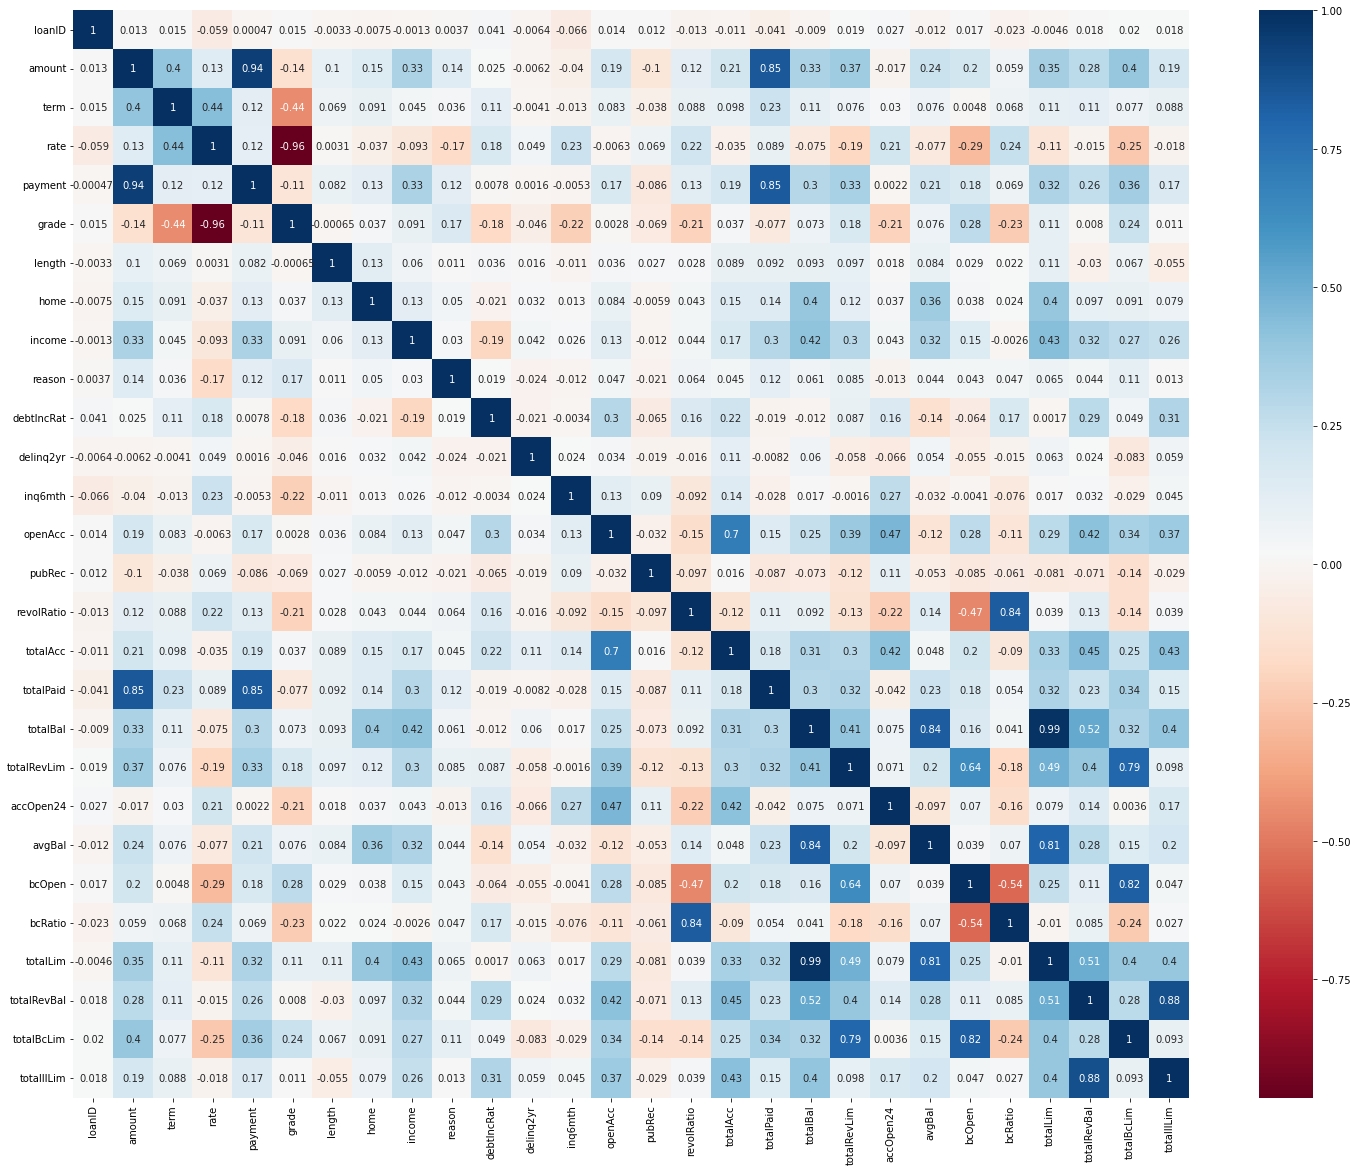

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated. 

plt.figure(figsize = (25,20))
sns.heatmap(grade_loan.corr(), annot = True, cmap="RdBu")
plt.show()

**Insight**

---

 **From the heatmap we can see no feature columns correlated strongly with grade(our target column)** 

**so prediction from this dataset (linear regression model) would not be greatly helpfull for customer.**

Though we will see data insight and will try to find some correlation that some way help to make better and fast decision.


we present this heatmap from A-G (safe to risk) value 7 to 1.

7 means full safe and 1 means full risky 

Here we searching for highly correlated feature(dependent variable) for giving a loan .

* first The total amount repaid to the bank, totalPaid, cannot be used as a predictor variable because it is information that cannot be known before the loan is issue.


now we will see negatively related feature
* when interest rate increase loan fraud  decrease

now we will see positively corelated feature


* amount - payment
* openAcc - totalAcc
* revolRatio - bcRatio
* totalBal - avgBal - totalIlLim - totalLim - avgBal -totalRevBal 
* totalRevLim - totalBcLim - bcOpen




## plotting numerical column with grade(risk factor) 

1. distplot
2. boxplot
3. jointplot

**distplot:**

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

**boxplot**

This kind of plot shows the three quartile values of the distribution along with extreme values.

## outlier detection



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


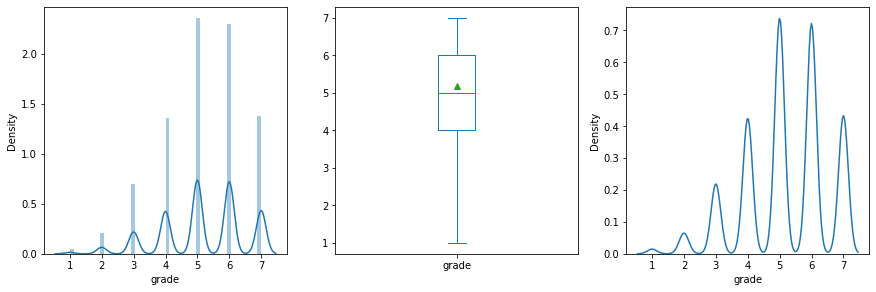

In [ ]:
#mean is more than median value and slight right skewed.
plt.figure(1)
plt.subplot(241)
sns.distplot(grade_loan['grade'])
plt.subplot(242)
grade_loan['grade'].plot.box(figsize = (20,10), showmeans=True)
plt.subplot(243)
sns.kdeplot(grade_loan['grade'])
plt.show()

Insights
* here we can see grade distributed mostly on 5 and 6 or b & c category a(7) and d(4) are equal .
* also mean value is above 5.
* grade between 4 to 7 are high because most people belongs to this point 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


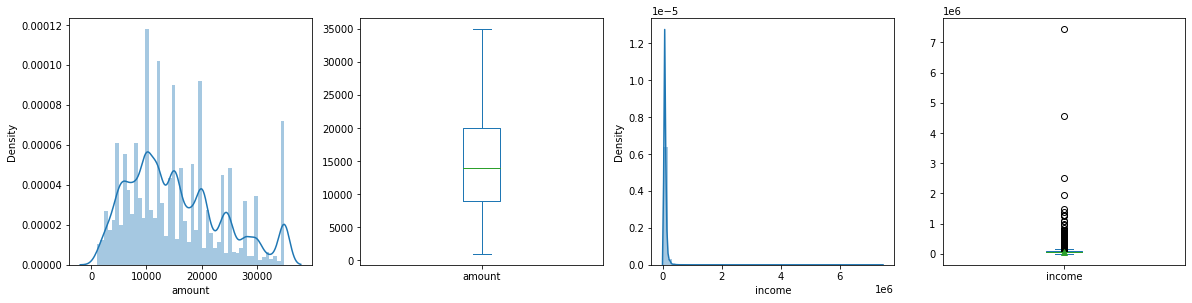

Text(0.5, 1.0, 'payment  income')

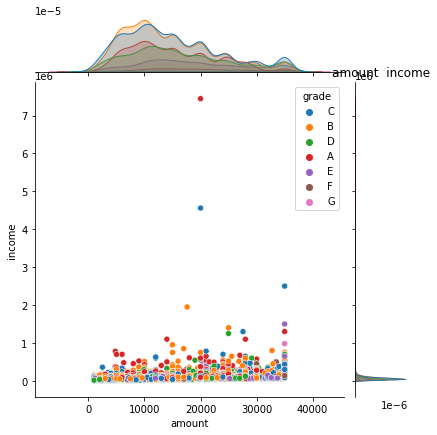

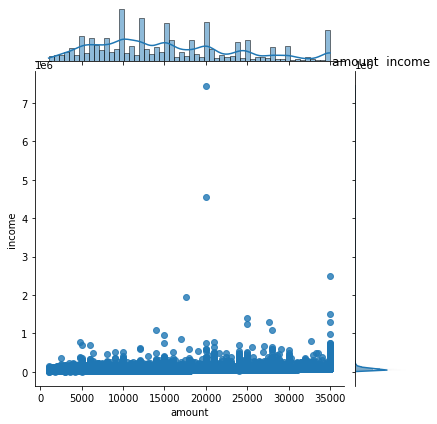

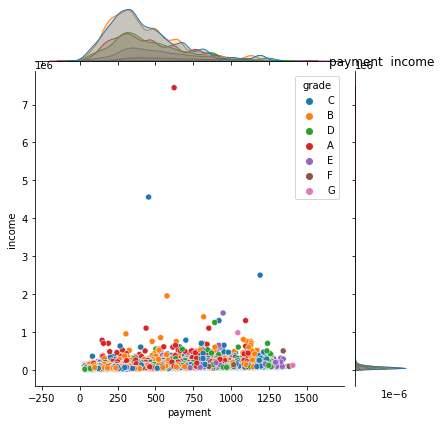

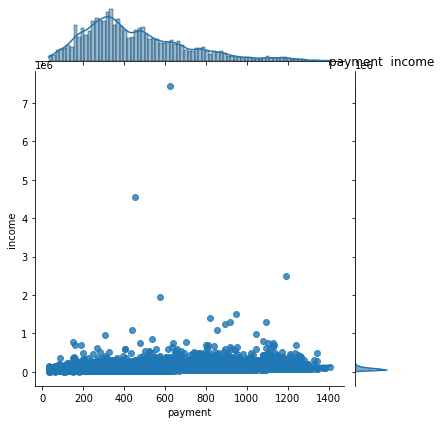

In [ ]:
# Here we have plotted amount and income distplot and box plot.
#  amount and income both are normally distributed.
#  income have some outlier as expected. some people income always low or high from mean+3rd standard deviation. 
plt.figure(1)
plt.subplot(241)
sns.distplot(grade_loan['amount'])
plt.subplot(242)
grade_loan['amount'].plot.box(figsize = (20,10))


plt.subplot(243)
sns.distplot(grade_loan['income'])
plt.subplot(244)
grade_loan['income'].plot.box(figsize = (20,10), showmeans=True)
plt.show()

sns.jointplot(x='amount',y='income',data=df_loan, hue="grade")
plt.title('amount  income')
sns.jointplot(x='amount',y='income',data=df_loan, kind="reg")
plt.title('amount  income')

sns.jointplot(x='payment',y='income',data=df_loan, hue="grade")
plt.title('payment  income')
sns.jointplot(x='payment',y='income',data=df_loan, kind="reg")
plt.title('payment  income')

**Insights**

Here we have plotted  income distplot and box plot.

* income have some outlier as expected. Those people who apply for bank loan some of them have higher income than average.   

* people who have high salary they apply for high amount of loan.

Then we have plotted joint plot amount-income and payment-income
* this plotting shows they are saturated to average income .


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


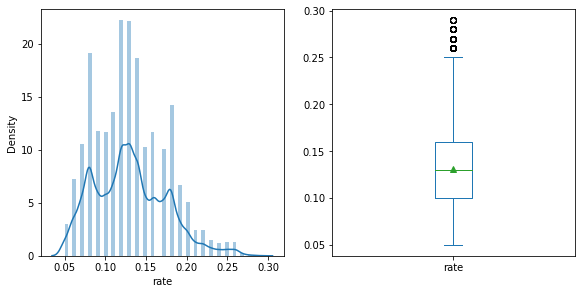

Text(0.5, 1.0, 'interest rate  by grade')

<Figure size 720x432 with 0 Axes>

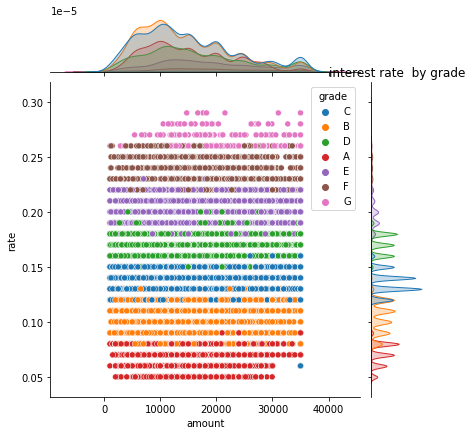

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(grade_loan['rate'])
plt.subplot(242)
grade_loan['rate'].plot.box(figsize = (20,10),showmeans=True)
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='amount',y='rate',data=df_loan,hue="grade")
plt.title('interest rate  by grade')

**Insights**

as we can see most interest rate are belongs to average value.
* Those who applied for loan if their interest rate cross .15 ,then they might not able to return monthly payment.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


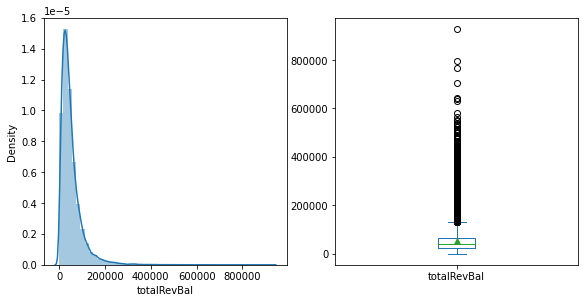

Text(0.5, 1.0, 'total credit balance except mortgages  with total balance')

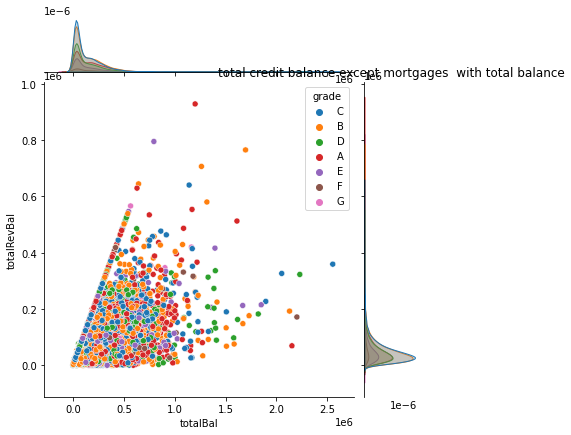

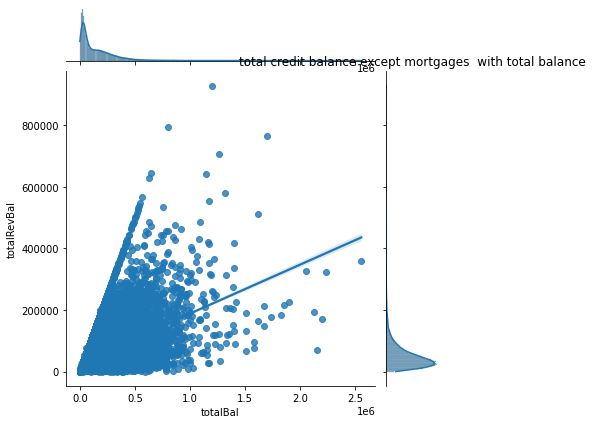

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(grade_loan['totalRevBal'])
plt.subplot(242)
grade_loan['totalRevBal'].plot.box(figsize = (20,10),showmeans=True)
plt.show()

# plt.figure(figsize=(10,6))
sns.jointplot(x='totalBal',y='totalRevBal',data=df_loan,hue="grade")
plt.title('total credit balance except mortgages  with total balance')

sns.jointplot(x='totalBal',y='totalRevBal',data=df_loan,kind="reg")
plt.title('total credit balance except mortgages  with total balance')


**Insights**

For total credit balance except mortgages .
we can see those who applied for loan and have grade5 they can repay money.

and from joint plot we can see totalBal not correlated with totalRevBal.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


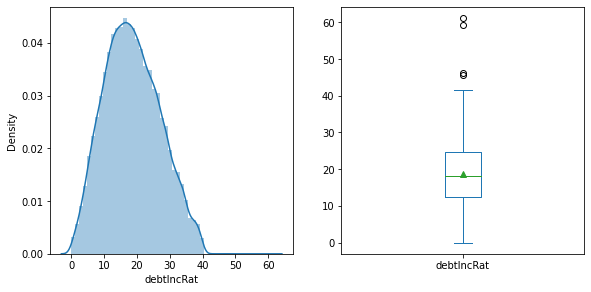

Text(0.5, 1.0, 'total credit limits  with average balance per account')

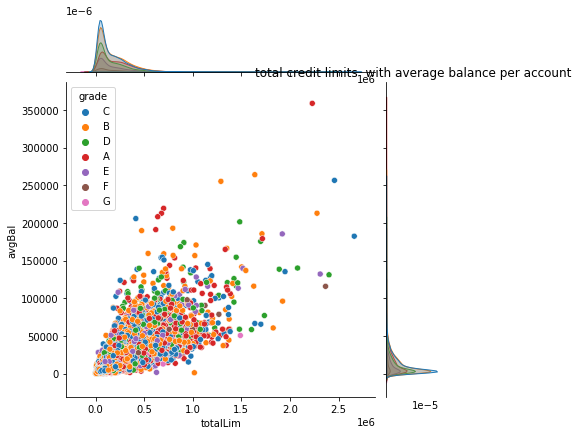

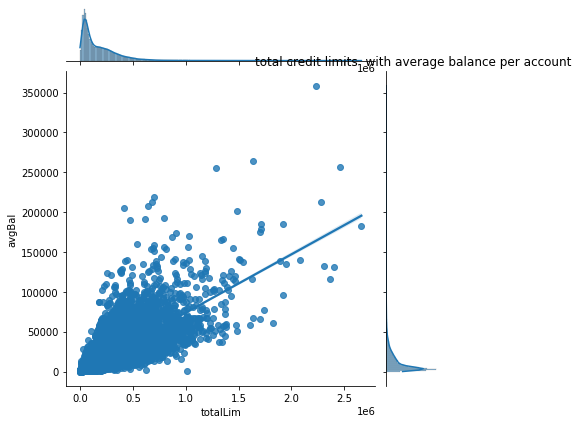

In [ ]:

# The ratio monthly non-mortgage debt payment to monthly income
# is normally distributed and almost no outliers
#.residuals value is high.
plt.figure(1)
plt.subplot(241)
sns.distplot(grade_loan['debtIncRat'])
plt.subplot(242)
grade_loan['debtIncRat'].plot.box(figsize = (20,10),showmeans=True)
plt.show()

# plt.figure(figsize=(10,6))
sns.jointplot(x='totalLim',y='avgBal',data=df_loan, hue="grade")
plt.title('total credit limits  with average balance per account')


sns.jointplot(x='totalLim',y='avgBal',data=df_loan, kind="reg")
plt.title('total credit limits  with average balance per account')

**Insights**



total credit limits and average balence not correlated much.

so we will not use these feature for model building

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


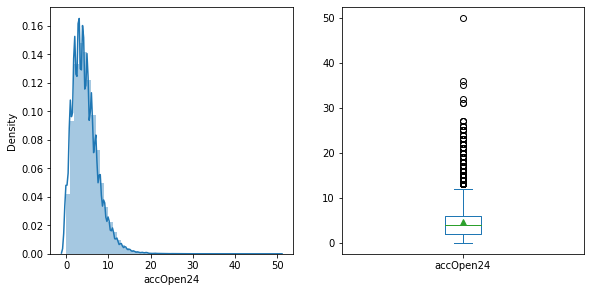

Text(0.5, 1.0, '\thow many accounts were opened in the past 24 months  by grade')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 720x432 with 0 Axes>

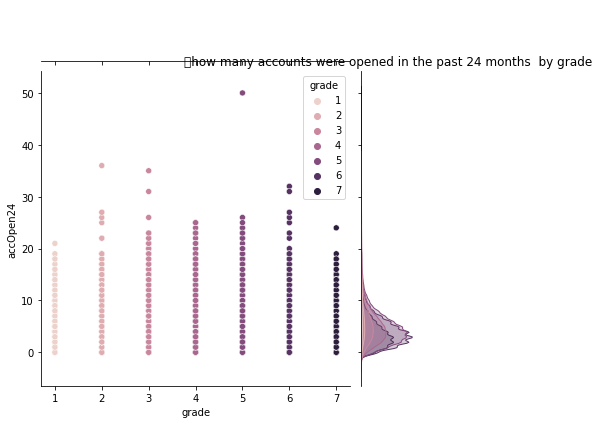

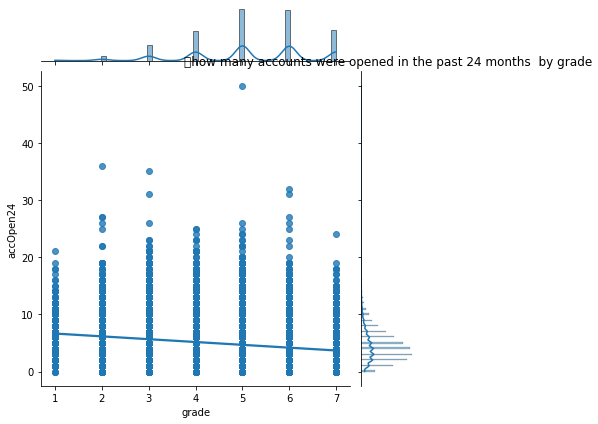

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(grade_loan['accOpen24'])
plt.subplot(242)
grade_loan['accOpen24'].plot.box(figsize = (20,10),showmeans=True)
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='accOpen24',data=grade_loan,hue="grade")
plt.title('	how many accounts were opened in the past 24 months  by grade')
sns.jointplot(x='grade',y='accOpen24',data=grade_loan,kind="reg")
plt.title('	how many accounts were opened in the past 24 months  by grade')

**Insights**

From jointplot no relation between grade with account open in last 24 month. 
so not usefull for model building

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


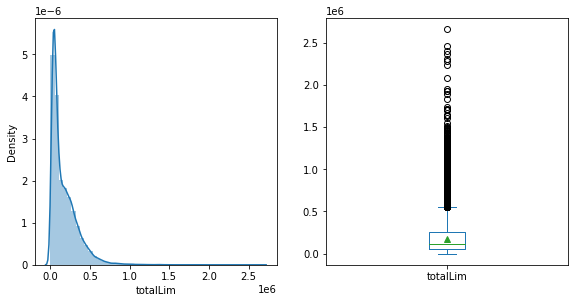

Text(0.5, 1.0, '\ttotal credit limits  by grade')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 720x432 with 0 Axes>

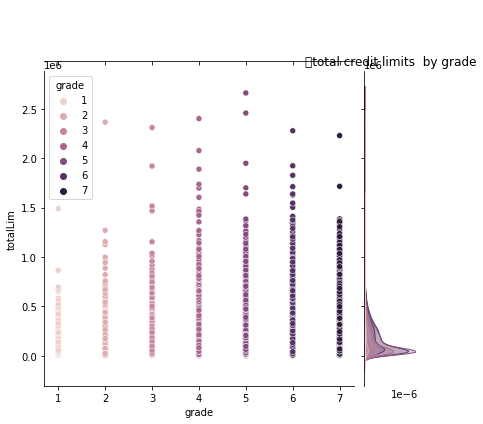

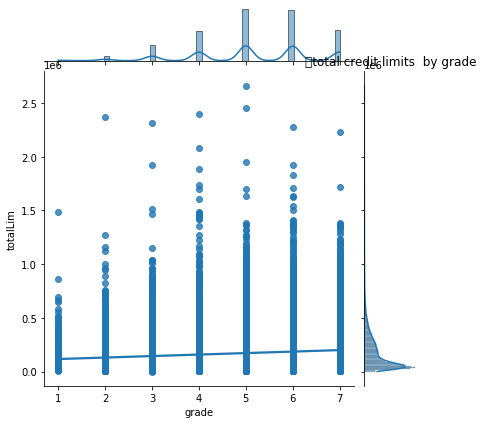

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_loan['totalLim'])
plt.subplot(242)
df_loan['totalLim'].plot.box(figsize = (20,10),showmeans=True)
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='totalLim',data=grade_loan,hue='grade')
plt.title('	total credit limits  by grade')
sns.jointplot(x='grade',y='totalLim',data=grade_loan,kind='reg')
plt.title('	total credit limits  by grade')

**Insights**

bc open means total unused credit on credit cards
not much correlated.

but over 100000 is safe zone

In [ ]:
grade_loan['totalLim'].isna().count()

46714

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


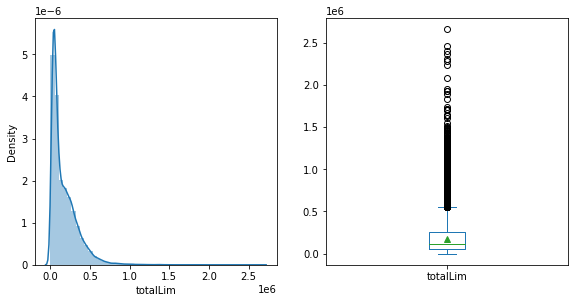

Text(0.5, 1.0, '\ttotal credit limits  by grade')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


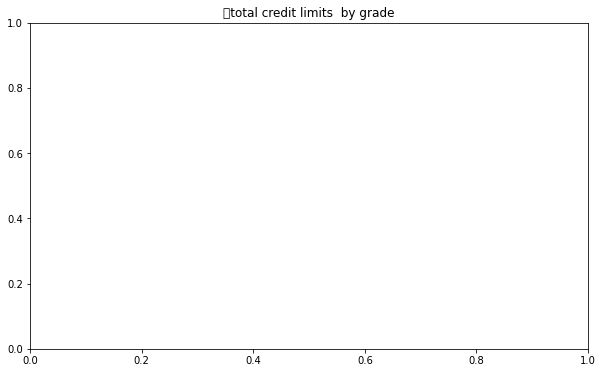

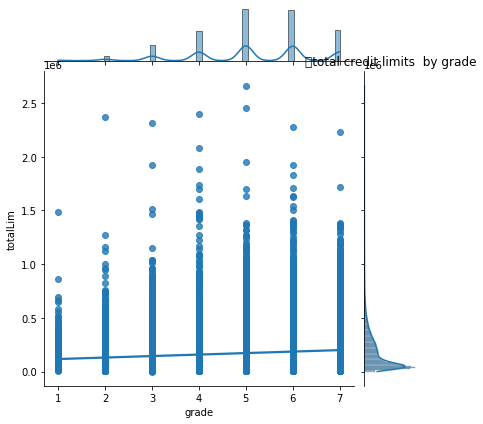

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_loan['totalLim'])
plt.subplot(242)
df_loan['totalLim'].plot.box(figsize = (20,10),showmeans=True)
plt.show()

plt.figure(figsize=(10,6))
# sns.jointplot(x='grade',y='totalLim',data=df_loan,hue='grade')
plt.title('	total credit limits  by grade')
sns.jointplot(x='grade',y='totalLim',data=grade_loan,kind='reg')
plt.title('	total credit limits  by grade')

**Insights**

have some outliers.
higher value is safe .above 1.5 lakh.

* **we are continuing with these outlier** 

## plotting all numerical column with pairplot

In [ ]:
grade_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46714 entries, 0 to 49998
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loanID       46714 non-null  int64  
 1   amount       46714 non-null  float64
 2   term         46714 non-null  int64  
 3   rate         46714 non-null  float64
 4   payment      46714 non-null  float64
 5   grade        46714 non-null  int64  
 6   length       46714 non-null  int64  
 7   home         46714 non-null  float64
 8   income       46714 non-null  float64
 9   reason       46714 non-null  int64  
 10  debtIncRat   46714 non-null  float64
 11  delinq2yr    46714 non-null  float64
 12  inq6mth      46714 non-null  float64
 13  openAcc      46714 non-null  float64
 14  pubRec       46714 non-null  float64
 15  revolRatio   46714 non-null  float64
 16  totalAcc     46714 non-null  float64
 17  totalPaid    46714 non-null  float64
 18  totalBal     46714 non-null  float64
 19  tota

In [ ]:
grade_loan.head()

,loanID,amount,term,rate,payment,grade,length,home,income,reason,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,revolRatio,totalAcc,totalPaid,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
0,188861,8000.0,1,0.14,272.07,5,3,2.0,49966.0,4,30.05,0.0,0.0,11.0,0.0,0.55,15.0,5914.67000,48054.0,8100.0,8.0,4369.0,43.0,95.7,60629.0,48054.0,1000.0,52529.0
1,517703,11000.0,1,0.10,354.89,6,10,3.0,50000.0,3,8.74,0.0,2.0,12.0,0.0,0.36,15.0,12024.75000,265838.0,33400.0,4.0,22153.0,19756.0,37.5,297500.0,11844.0,31600.0,0.0
2,268587,35000.0,1,0.15,1220.33,4,10,2.0,360000.0,3,14.50,0.0,1.0,8.0,0.0,0.83,14.0,31668.65000,850150.0,83000.0,2.0,121450.0,7686.0,83.2,907300.0,173260.0,83000.0,100000.0
3,579902,20000.0,2,0.12,447.83,5,2,3.0,60000.0,3,14.14,0.0,0.0,12.0,3.0,0.01,48.0,23827.22901,20671.0,14200.0,8.0,1723.0,11061.0,1.2,46964.0,20671.0,11200.0,32764.0
4,617630,12000.0,2,0.12,266.88,6,10,3.0,64000.0,3,5.14,0.0,0.0,8.0,0.0,0.58,22.0,9599.69000,128034.0,14600.0,3.0,18291.0,5904.0,58.4,134600.0,8475.0,14200.0,0.0


In [ ]:
grade_loan.describe()

,loanID,amount,term,rate,payment,grade,length,home,income,reason,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,revolRatio,totalAcc,totalPaid,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
count,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,4.671400e+04,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,4.671400e+04,4.671400e+04,46714.000000,46714.000000,46714.000000,46714.000000,4.671400e+04,46714.000000,46714.000000,46714.000000
mean,326901.441431,15342.429464,1.332363,0.130209,447.475290,5.180203,6.125016,2.404097,7.755333e+04,3.145952,18.677516,0.346705,0.641157,11.972171,0.225350,0.548448,25.847776,14810.810369,1.424781e+05,3.271266e+04,4.577621,13308.496425,9144.511153,63.353772,1.748247e+05,52023.914158,21531.246157,43545.898189
std,189922.890203,8542.639785,0.471065,0.044255,245.254445,1.309599,3.561834,0.662988,6.630007e+04,0.761962,8.410715,0.907830,0.940866,5.545394,0.613409,0.235892,12.115766,9420.487502,1.537507e+05,3.217022e+04,3.081678,15535.903900,14171.693125,27.134613,1.707713e+05,47351.460193,21072.456424,43528.790210
min,16.000000,1000.000000,1.000000,0.050000,30.540000,1.000000,1.000000,1.000000,1.000000e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000e+00,3.000000e+02,0.000000,0.000000,0.000000,0.000000,7.000000e+02,0.000000,0.000000,0.000000
25%,161636.250000,9000.000000,1.000000,0.100000,269.520000,4.000000,3.000000,2.000000,4.800000e+04,3.000000,12.360000,0.000000,0.000000,8.000000,0.000000,0.370000,17.000000,7772.738393,3.173225e+04,1.430000e+04,2.000000,3250.000000,1243.250000,43.400000,5.152150e+04,22904.250000,7800.000000,16000.000000
50%,325205.000000,14000.000000,1.000000,0.130000,391.280000,5.000000,6.000000,3.000000,6.500000e+04,3.000000,18.150000,0.000000,0.000000,11.000000,0.000000,0.550000,24.000000,12632.952945,8.426600e+04,2.430000e+04,4.000000,7536.500000,4077.000000,67.300000,1.152945e+05,39601.000000,15100.000000,33000.000000
75%,492359.000000,20000.000000,2.000000,0.160000,586.745000,6.000000,10.000000,3.000000,9.200000e+04,4.000000,24.640000,0.000000,1.000000,15.000000,0.000000,0.730000,33.000000,19974.226065,2.129392e+05,4.070000e+04,6.000000,18419.750000,10915.750000,87.100000,2.536075e+05,65289.000000,28000.000000,58169.500000
max,656727.000000,35000.000000,2.000000,0.290000,1407.010000,7.000000,10.000000,3.000000,7.446395e+06,5.000000,61.210000,15.000000,6.000000,76.000000,28.000000,1.670000,162.000000,58697.442090,2.552960e+06,1.013700e+06,50.000000,358652.000000,373005.000000,161.000000,2.661185e+06,928934.000000,373100.000000,689474.000000


## pairplot for numerical value lets see pattern


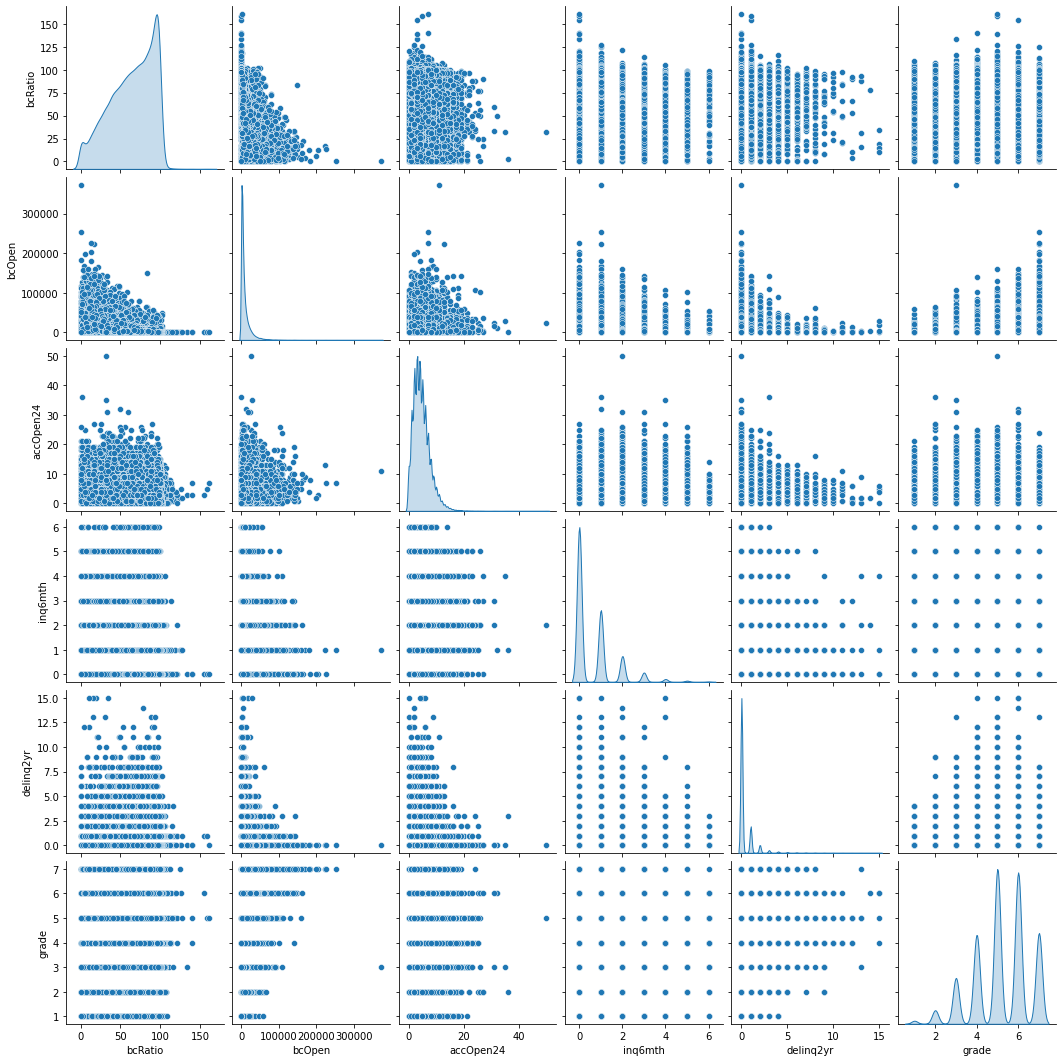

In [ ]:
# Create a new dataframe of only numeric variables:

loan_num=grade_loan[['bcRatio','bcOpen','accOpen24','inq6mth','delinq2yr','grade']]
sns.pairplot(loan_num, diag_kind='kde')
plt.show()

Insights
* deliinq2yr + bcRatio upto 7.5 is safe

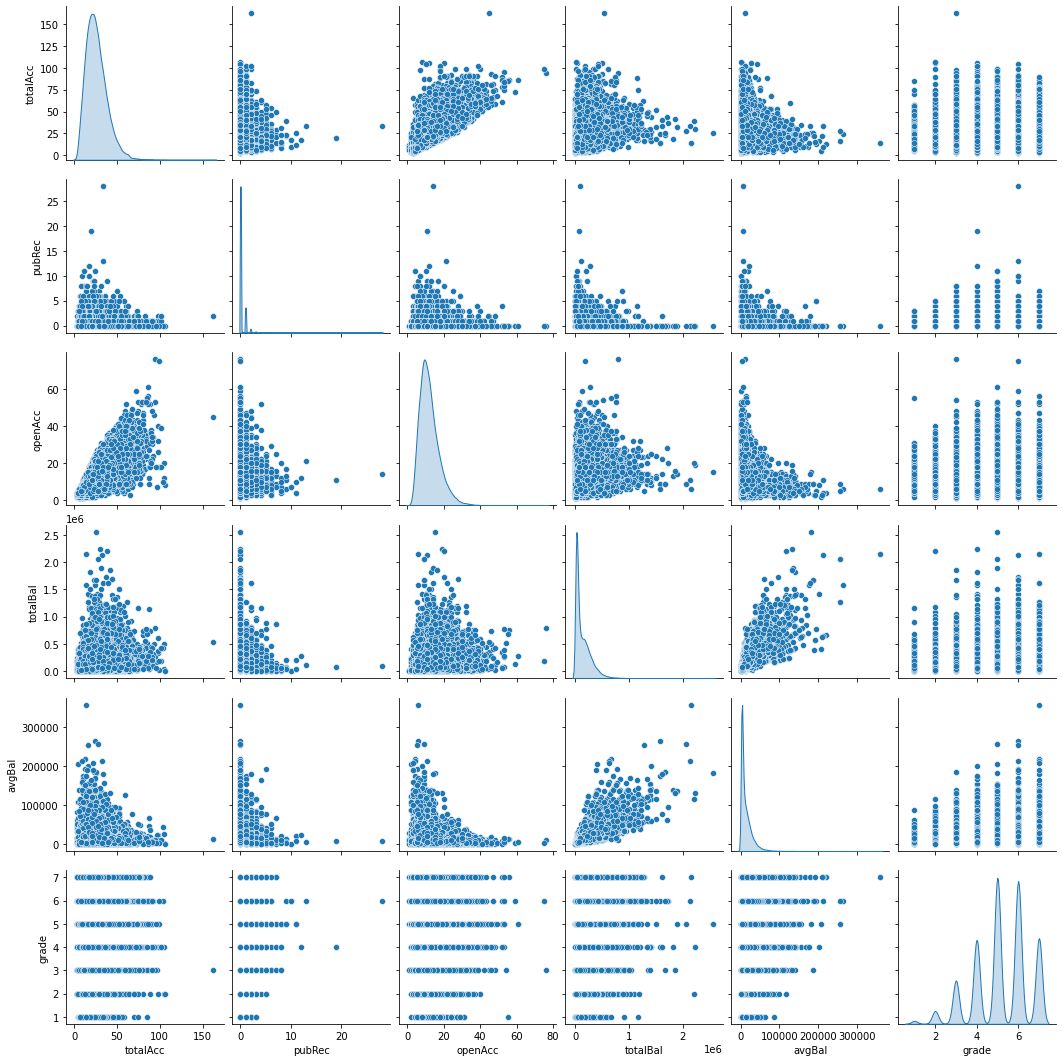

In [ ]:
# Create a new dataframe of only numeric variables:

loan_num1=grade_loan[['totalAcc','pubRec','openAcc','totalBal','avgBal','grade']]
sns.pairplot(loan_num1, diag_kind='kde')
plt.show()

Insights
* totalAcc + openAcc linear relation
* totalBal + avgBal linear relation

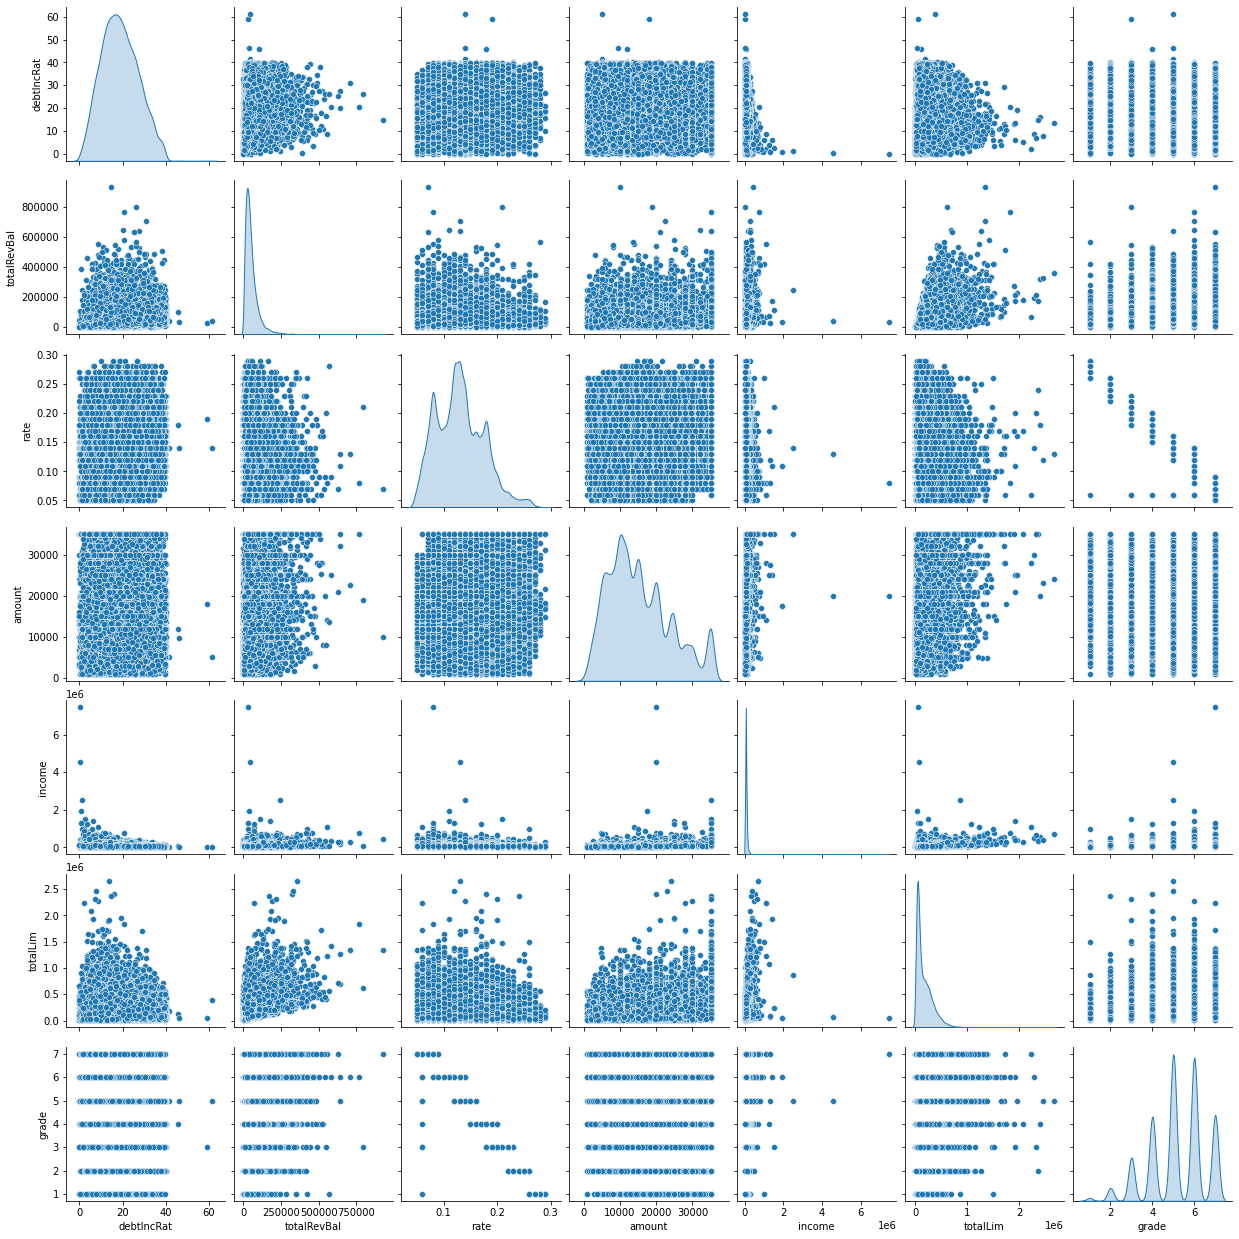

In [ ]:
loan_nu1m=grade_loan[['debtIncRat','totalRevBal','rate','amount','income','totalLim','grade']]
sns.pairplot(loan_nu1m, diag_kind='kde')
plt.show()


Insights
* totalRavBal + totalLim

## categorical feature 

1. crosstab bar stacked
2. boxplot


### barplot

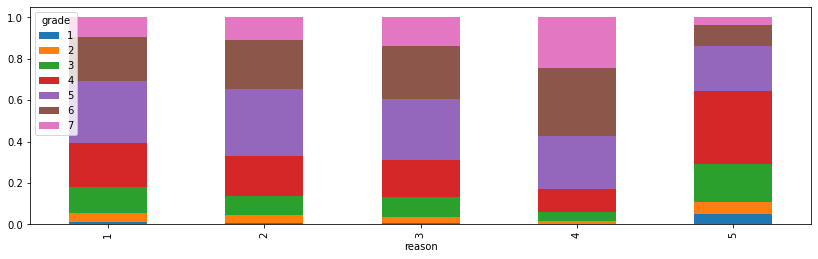

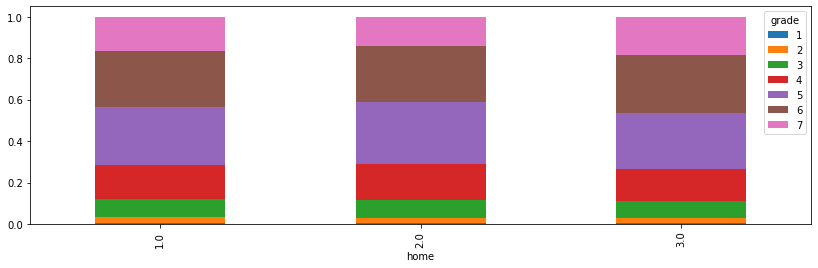

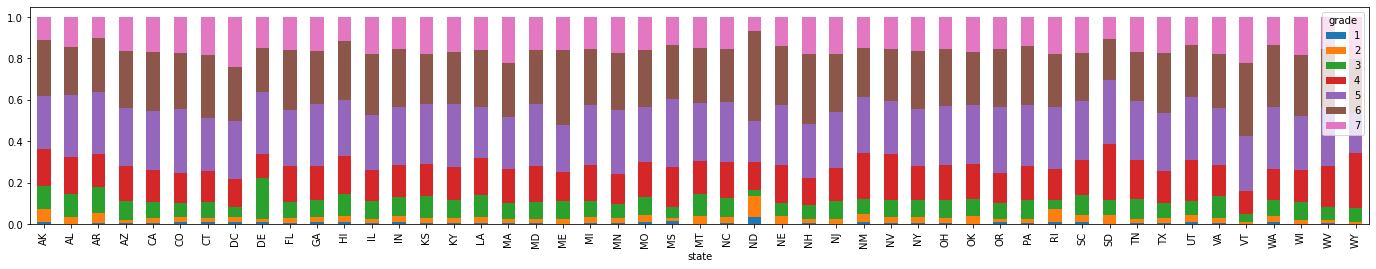

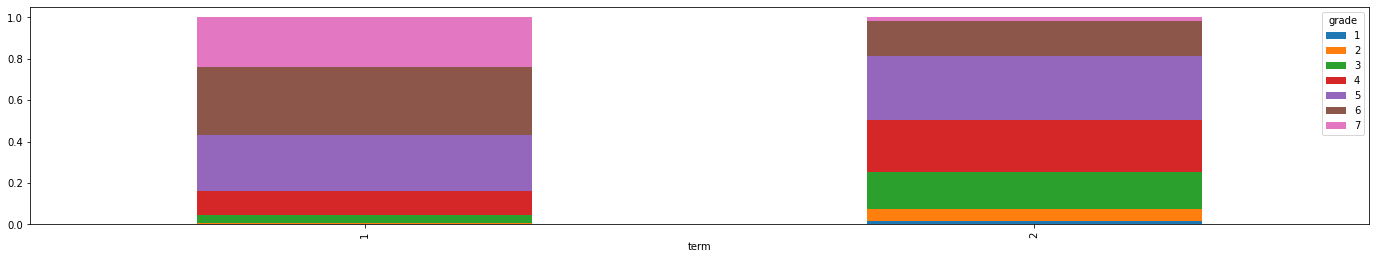

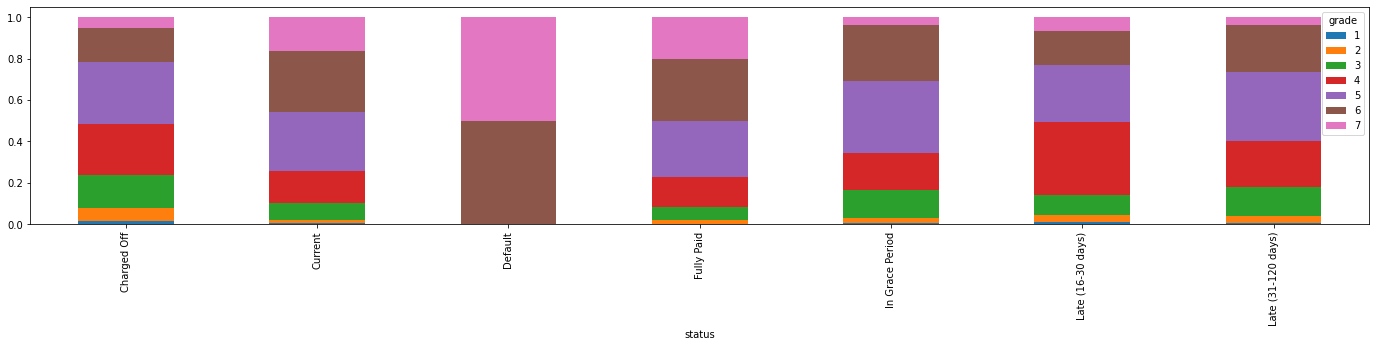

In [ ]:
# employment = pd.crosstab(df_loan['employment'], df_loan['grade'])
# employment.div(employment.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
# plt.show()

# length = pd.crosstab(df_loan['length'], df_loan['grade'])
# length.div(length.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
# plt.show()

reason = pd.crosstab(grade_loan['reason'], grade_loan['grade'])
reason.div(reason.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (14,4))
plt.show()

home = pd.crosstab(grade_loan['home'], grade_loan['grade'])
home.div(home.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (14,4))
plt.show()

state = pd.crosstab(df_loan['state'], grade_loan['grade'])
state.div(state.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (24,4))
plt.show()

term = pd.crosstab(grade_loan['term'], grade_loan['grade'])
term.div(term.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (24,4))
plt.show()

status = pd.crosstab(df_loan['status'], grade_loan['grade'])
status.div(status.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (24,4))
plt.show()


### box plot

In [ ]:
df_loan.nunique()

loanID         46714
amount          1251
term               2
rate              25
payment        14592
grade              7
employment     21203
length            11
home               3
income          4288
verified           3
status             7
reason            13
state             49
debtIncRat      3912
delinq2yr         16
inq6mth            7
openAcc           58
pubRec            16
revolRatio       121
totalAcc         102
totalPaid      44627
totalBal       42500
totalRevLim     2850
accOpen24         33
avgBal         23515
bcOpen         19018
bcRatio         1111
totalLim       40431
totalRevBal    37441
totalBcLim      1839
totalIlLim     31668
dtype: int64

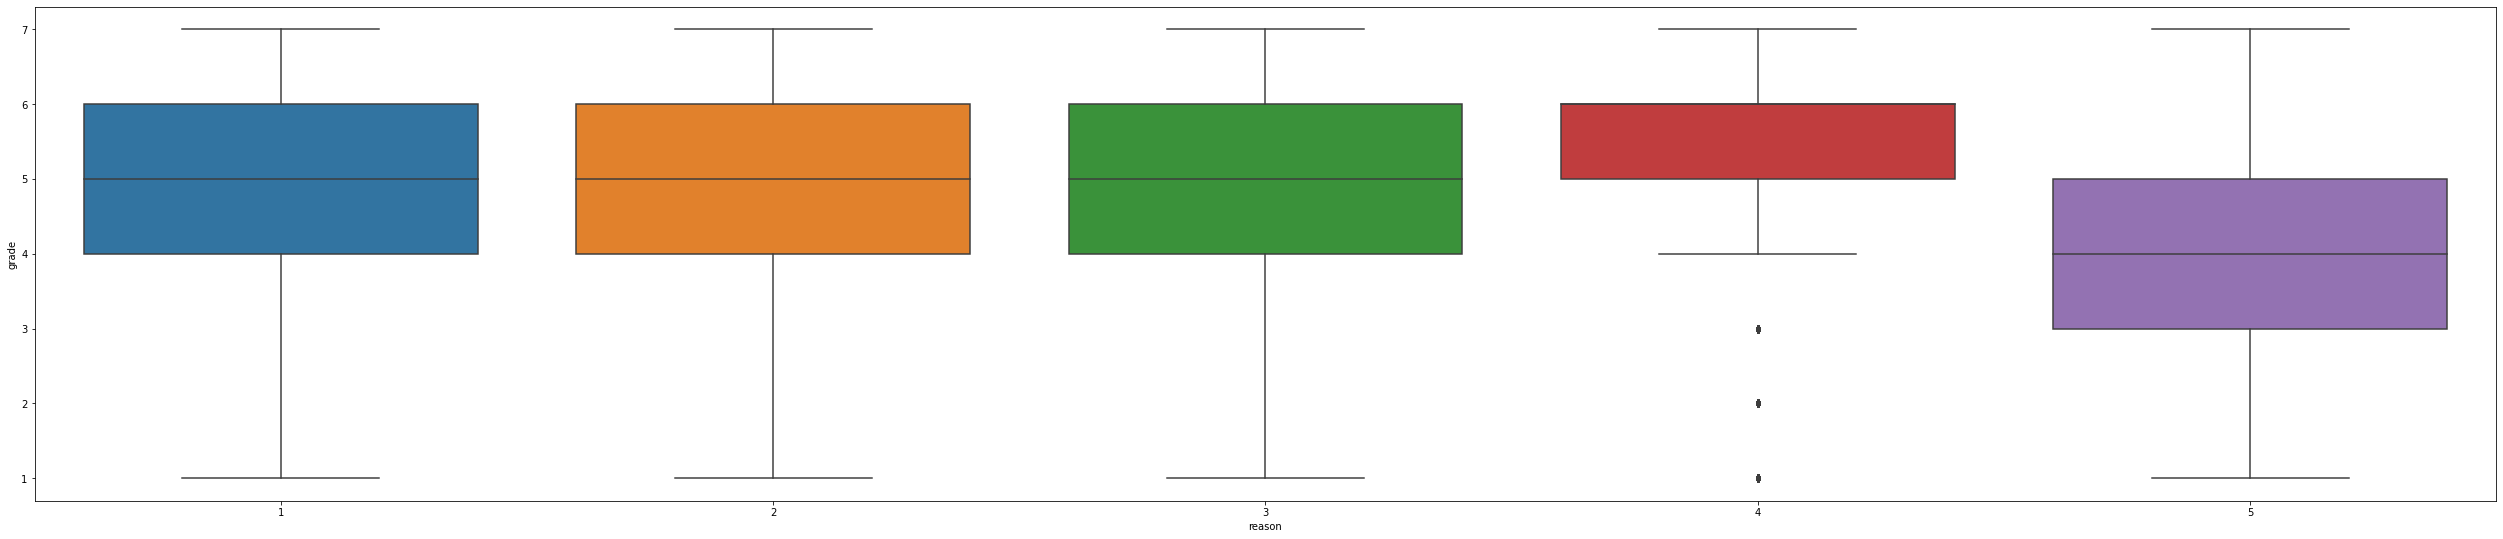

In [ ]:
plt.figure(figsize=(150, 20))
plt.subplot(2,3,1)
sns.boxplot(x = 'reason', y = 'grade', data = grade_loan)

plt.show()

Insights
* credit card loan is safe
* house & small business loan is risky

In [ ]:
# plt.figure(figsize=(150, 20))
# plt.subplot(2,3,2)
# sns.boxplot(x = 'state', y = 'grade', data = grade_loan)
# plt.show()

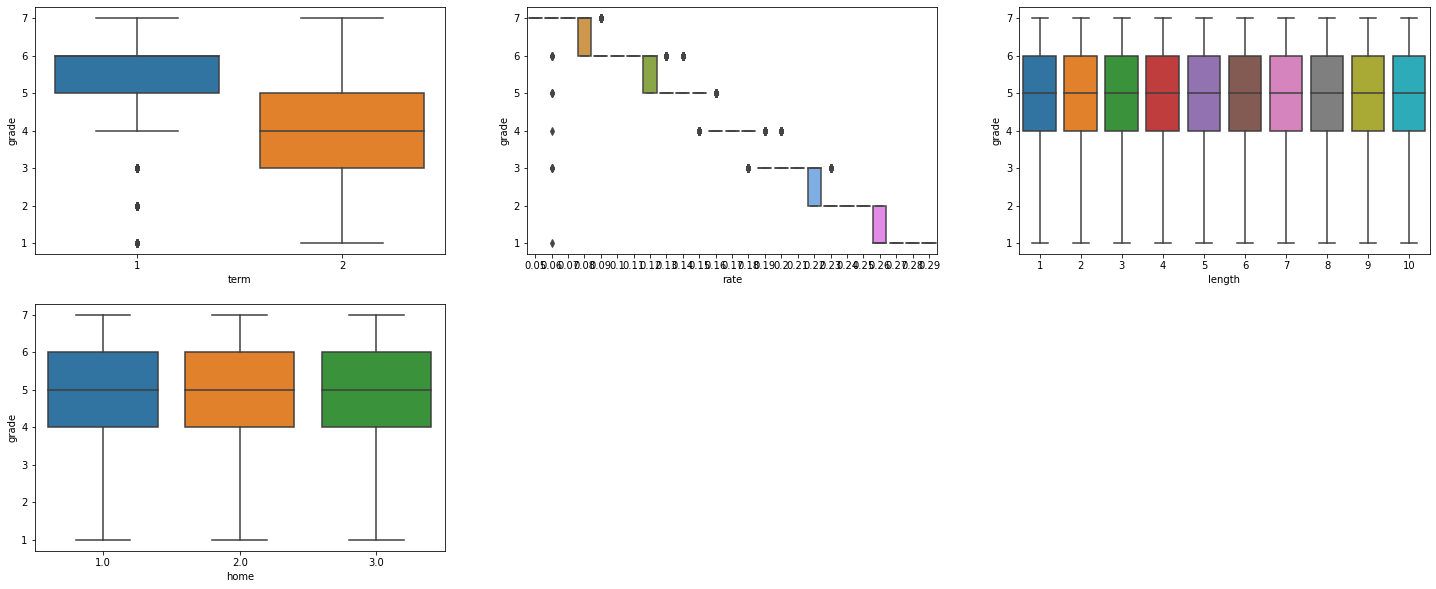

In [ ]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'grade' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'term', y = 'grade', data = grade_loan)

plt.subplot(2,3,2)
sns.boxplot(x = 'rate', y = 'grade', data = grade_loan)

plt.subplot(2,3,3)
sns.boxplot(x = 'length', y = 'grade', data = grade_loan)

plt.subplot(2,3,4)
sns.boxplot(x = 'home', y = 'grade', data = grade_loan)

# plt.subplot(2,3,5)
# sns.boxplot(x = 'verified', y = 'grade', data = grade_loan)



Insights

There were 9 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (grade) .

The inference that We could derive were:
* term: lower term more safe than long loke 60 months
* rate : till mean value .13 is safe or D type risk
* length : job length have not have any contribution for fraud
* home: home also have no contribution to frauds
* verified: it denotes data is varified but all types are belong to safe range

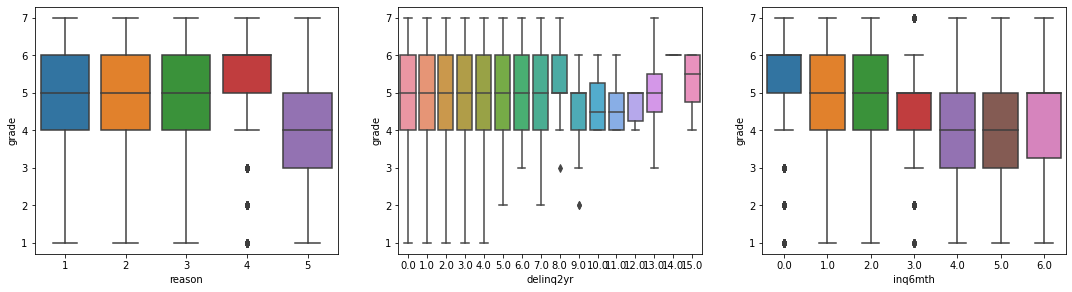

In [ ]:
plt.figure(figsize=(25, 10))

plt.subplot(2,4,1)
sns.boxplot(x = 'reason', y = 'grade', data = grade_loan)

plt.subplot(2,4,2)
sns.boxplot(x = 'delinq2yr', y = 'grade', data = grade_loan)

plt.subplot(2,4,3)
sns.boxplot(x = 'inq6mth', y = 'grade', data = grade_loan)
plt.show()